In [2]:
# Import Libraries
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from stats import math

In [3]:
df = pandas.read_csv("C:/Users/KIIT/Downloads/Housing.csv") 
print(df.info())
print(df.describe(percentiles=[0.2,0.4,0.6,0.8]))
print(df.shape)
print(df.select_dtypes(include=['number']).quantile(0.25))
print(df['price'].quantile(0.25))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

In [4]:
# Sampling Techniques
# Simple random Sampling
n=10
sample_df=df.sample(n)
print('Simple random Sampling',sample_df)

Simple random Sampling        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
526  2310000  3180         2          1        1      yes        no       no   
357  3773000  6930         4          1        2       no        no       no   
539  1855000  2990         2          1        1       no        no       no   
464  3080000  4500         2          1        2      yes        no       no   
117  5950000  3700         4          1        2      yes       yes       no   
197  4956000  2800         3          2        2       no        no      yes   
15   9100000  6000         4          1        2      yes        no      yes   
535  2100000  3360         2          1        1      yes        no       no   
112  6083000  4300         6          2        2      yes        no       no   
232  4655000  3745         3          1        2      yes        no      yes   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
526              no    

In [5]:
# Systematic sampling
n=15
systematic_sample = df.iloc[::n].head(n)
print('Systematic sampling:', systematic_sample)

Systematic sampling:         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
15    9100000  6000         4          1        2      yes        no      yes   
30    8400000  7475         3          2        4      yes        no       no   
45    7560000  6000         3          2        3      yes        no       no   
60    7140000  6000         3          2        2      yes       yes       no   
75    6650000  4260         4          2        2      yes        no       no   
90    6440000  5000         3          1        2      yes        no       no   
105   6160000  4500         3          1        4      yes        no       no   
120   5950000  6540         3          1        1      yes       yes      yes   
135   5775000  6000         3          2        4      yes        no       no   
150   5600000  5136         3          1        2      yes       yes      yes   
165   5

In [6]:
# Stratified sampling

# Get stratified sample for bedrooms
min_size = df.groupby('bedrooms').size().min()
stratified_sample = df.groupby('bedrooms', group_keys=False).apply(lambda x: x.sample(n=min_size))
print('Stratified sampling:', stratified_sample)

Stratified sampling:        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
528  2275000  3970         1          1        1       no        no       no   
445  3150000  3450         1          1        1      yes        no       no   
344  3850000  3850         2          1        1      yes        no       no   
362  3710000  4050         2          1        1      yes        no       no   
345  3850000  2015         3          1        2      yes        no      yes   
83   6580000  6000         3          2        4      yes        no       no   
11   9681000  6000         4          3        2      yes       yes      yes   
472  3010000  3630         4          1        2      yes        no       no   
340  3850000  5300         5          2        2      yes        no       no   
143  5600000  4800         5          2        3       no        no      yes   
112  6083000  4300         6          2        2      yes        no       no   
395  3500000  3600 

C:\Users\KIIT\AppData\Local\Temp\ipykernel_11284\1459683603.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('bedrooms', group_keys=False).apply(lambda x: x.sample(n=min_size))


In [7]:
# Cluster sampling         

df['price_cluster'] = pandas.qcut(df['price'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
selected_clusters = np.random.choice(df['price_cluster'].unique(), size=2, replace=False)
cluster_sample = df[df['price_cluster'].isin(selected_clusters)]
print('Cluster sampling:', cluster_sample)

Cluster sampling:        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
136  5740000  5400         4          2        2      yes        no       no   
137  5740000  4640         4          1        2      yes        no       no   
138  5740000  5000         3          1        3      yes        no       no   
139  5740000  6360         3          1        1      yes       yes      yes   
140  5740000  5800         3          2        4      yes        no       no   
..       ...   ...       ...        ...      ...      ...       ...      ...   
540  1820000  3000         2          1        1      yes        no      yes   
541  1767150  2400         3          1        1       no        no       no   
542  1750000  3620         2          1        1      yes        no       no   
543  1750000  2910         3          1        1       no        no       no   
544  1750000  3850         3          1        2      yes        no       no   

    hotwaterheating a

In [8]:
# Outlier detection using IQR

data=np.random.normal(loc=0,size=100,scale=1)
len(data), data

Q1=np.percentile(data,25)
Q3=np.percentile(data,75)
IQR=Q3-Q1
print(IQR)

1.351507961765349


In [9]:
# Calculate upper and lower boundaries for outliers
lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

print("Lower boundary for outliers:", lower_boundary)
print("Upper boundary for outliers:", upper_boundary)

Lower boundary for outliers: -2.5400864371953493
Upper boundary for outliers: 2.865945409866047


In [10]:
# Find outliers
outliers = data[(data < lower_boundary) | (data > upper_boundary)]
print("Number of outliers:", len(outliers))
print("Outliers:", outliers)

Number of outliers: 1
Outliers: [2.92312745]


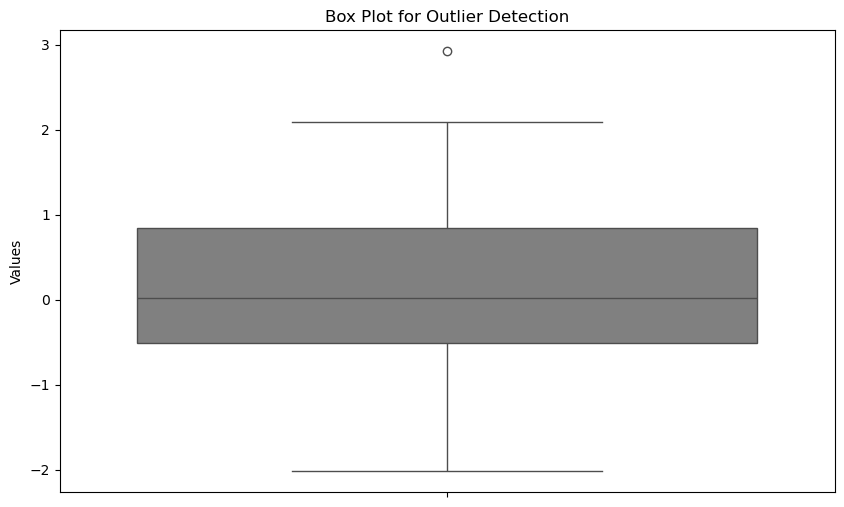

In [11]:
# Create a box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, color='grey')
plt.title('Box Plot for Outlier Detection')
plt.ylabel('Values')
plt.show()

In [12]:
# Compute correlation matrix for numeric columns if not already defined
if 'correlation_matrix' not in locals():
    correlation_matrix = df.select_dtypes(include=[np.number]).corr()

threshold = 0  # Lower the threshold to see more correlated pairs
high_corr_features = np.where(np.abs(correlation_matrix) > threshold)
high_corr_features = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) for x, y in zip(*high_corr_features) if x != y]
for feat1, feat2, corr in high_corr_features:
    print(f"{feat1} - {feat2}: {corr:.2f}")


price - area: 0.54
price - bedrooms: 0.37
price - bathrooms: 0.52
price - stories: 0.42
price - parking: 0.38
area - price: 0.54
area - bedrooms: 0.15
area - bathrooms: 0.19
area - stories: 0.08
area - parking: 0.35
bedrooms - price: 0.37
bedrooms - area: 0.15
bedrooms - bathrooms: 0.37
bedrooms - stories: 0.41
bedrooms - parking: 0.14
bathrooms - price: 0.52
bathrooms - area: 0.19
bathrooms - bedrooms: 0.37
bathrooms - stories: 0.33
bathrooms - parking: 0.18
stories - price: 0.42
stories - area: 0.08
stories - bedrooms: 0.41
stories - bathrooms: 0.33
stories - parking: 0.05
parking - price: 0.38
parking - area: 0.35
parking - bedrooms: 0.14
parking - bathrooms: 0.18
parking - stories: 0.05


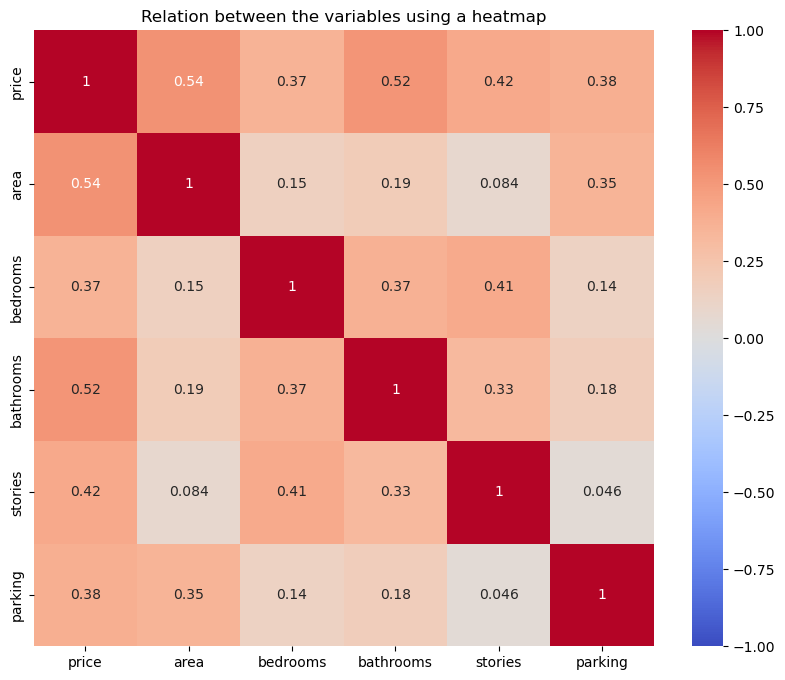

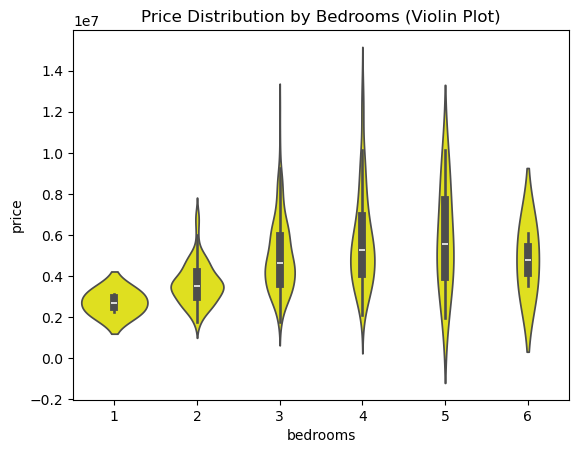

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

In [13]:
# Visualize correlation matrix for selected features
plt.figure(figsize=(10, 8))
mask = abs(correlation_matrix) > threshold
sns.heatmap(correlation_matrix.where(mask), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Relation between the variables using a heatmap')
plt.show()
sns.violinplot(x='bedrooms', y='price', data=df, inner='box', color='yellow', saturation=0.75)
plt.title('Price Distribution by Bedrooms (Violin Plot)')
sns.choose_colorbrewer_palette(data_type='sequential')
plt.show()

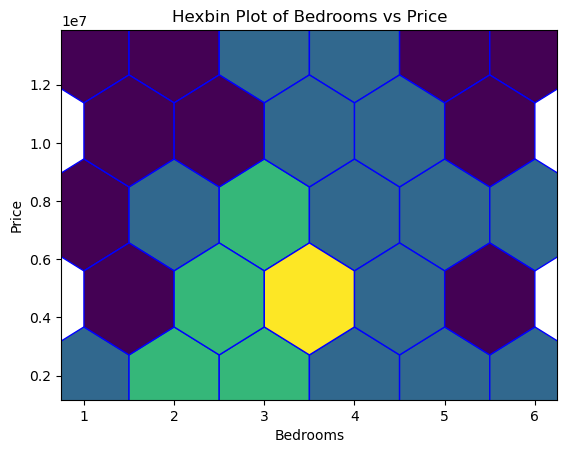

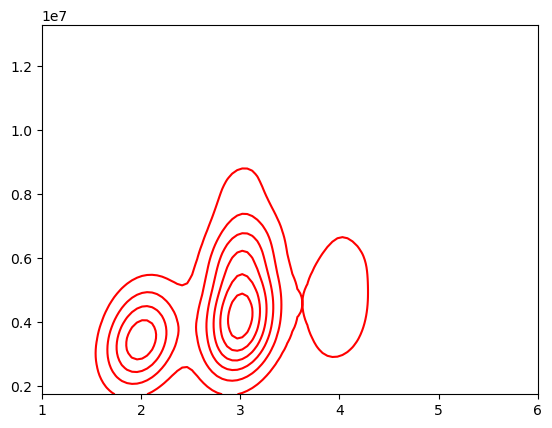

In [14]:
from scipy.stats import gaussian_kde

# Hexbins

plt.hexbin(df['bedrooms'], df['price'], gridsize=5, bins=4, edgecolors='blue')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Hexbin Plot of Bedrooms vs Price')
plt.margins(x=0.05, y=0.05)
plt.show()
plt.copper()

# Contour plots require 2D grid data, not 1D arrays. We'll use a 2D histogram as a density estimate.

# Prepare grid for contour
x = df['bedrooms'].values
y = df['price'].values
k = gaussian_kde([x, y])
xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

plt.contour(xi, yi, zi.reshape(xi.shape), colors='red')
plt.show()

In [29]:
# Calculate confidence interval for mean price

# Calculate mean and standard error
mean_price = np.mean(df['price']) # mean
std_error = stats.sem(df['price']) # sem - standard error of mean

# Calculate sample size, mean, and critical value
sample_size = len(df['price'])
mean = df['price'].mean()
variance = df['price'].var(ddof=1)
std_dev = df['price'].std(ddof=1)

# Calculating sample statistics
print("\nSample Statistics:")
print(f"Sample Size: {sample_size}")
print(f"Mean Price: ${mean:.2f}")
print(f"Variance: {variance}")
print(f"Standard deviation: {std_dev}")
print(f"Standardisation error: {std_error:.4f}")

# T-Distribution

# Calculate critical value for 95% confidence level

cl = 0.95 # confidence level
alpha = (1 - cl)/2 # value of alpha

# The percent point function (ppf) is the inverse of the cumulative distribution function (CDF).
# For a given probability, ppf returns the value (critical value) such that the probability of the variable being less than or equal to that value is equal to the given probability.
# In this context, stats.t.ppf(0.975, df=sample_size-1) gives the t-score for a 95% confidence interval (two-tailed), which is used to calculate the margin of error.
t_score = stats.t.ppf(0.975, df=sample_size-1) # 0.975 because it's two-tailed test
# dof = sample_size - 1
# t_score = stats.t.ppf(1 - alpha, dof)
print(f"The value of t_score: {t_score}")

# This computes the cumulative distribution function (CDF) of the t-distribution at 0.975 with the given degrees of freedom.
# In this context, 'cum_dist' is the probability that a t-distributed random variable with (sample_size - 1) degrees of freedom is less than or equal to 0.975.
# It is not the critical value used for confidence intervals.
cum_dist = stats.t.cdf(0.975, df=sample_size - 1) # 0.975 because it's two-tailed test

# Finding CDF and PPF
print(f"Critical Value | PPF: {t_score:.4f}")
print(f"Not a Critical Value | CDF: {cum_dist:.4f}")

# Calculate margin of error using the critical value (t_score)
# margin_err = t_score * std_error
margin_of_error = t_score * (std_dev / math.sqrt(sample_size))
print(f"Margin of Error: ${margin_of_error:.2f}")

# Calculate confidence interval bounds using the critical value (t_score)
ci_lower = mean - t_score * std_error
ci_upper = mean + t_score * std_error
print(f"95% Confidence Interval for Mean Price: (${ci_lower:.2f}, ${ci_upper:.2f})")

# Z - Distribution

# Calculate z-value for the given confidence level (two-tailed)
z_score = stats.norm.ppf(1 - (1 - cl) / 2)
print(f"The value of z-score: {z_score}")

margin_of_error = z_score * (std_dev / math.sqrt(sample_size))

lower_limit = mean_price - margin_of_error
upper_limit = mean_price + margin_of_error

print(f"Confidence Interval: ({lower_limit:.3f}, {upper_limit:.3f})")



Sample Statistics:
Sample Size: 545
Mean Price: $4766729.25
Variance: 3498544355820.5796
Standard deviation: 1870439.615657394
Standardisation error: 80120.8303
The value of t_score: 1.9643343306673329
Critical Value | PPF: 1.9643
Not a Critical Value | CDF: 0.8350
Margin of Error: $157384.10
95% Confidence Interval for Mean Price: ($4609345.15, $4924113.35)
The value of z-score: 1.959963984540054
Confidence Interval: (4609695.306, 4923763.189)


In [16]:
# Perform one-sample t-test
# H0: population mean = sample mean - null hypothesis
# H1: population mean ≠ sample mean - alternative hypothesis
hypothetical_mean = 500000  # null hypothesis value
t_stat, p_value = stats.ttest_1samp(df['price'], hypothetical_mean)

print("\nOne-Sample T-Test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print("Reject null hypothesis" if p_value < 0.05 else "Fail to reject null hypothesis")


One-Sample T-Test Results:
T-statistic: 53.2537
P-value: 0.0000
Reject null hypothesis


In [17]:
# Perform two-sample t-test
# Compare prices of houses with 2 bedrooms vs 3 bedrooms
two_bed = df[df['bedrooms'] == 2]['price']
three_bed = df[df['bedrooms'] == 3]['price']
t_stat2, p_value2 = stats.ttest_ind(two_bed, three_bed)

print("\nTwo-Sample T-Test Results:")
print(f"T-statistic: {t_stat2:.4f}")
print(f"P-value: {p_value2:.4f}")
print("Reject null hypothesis" if p_value2 < 0.05 else "Fail to reject null hypothesis")


Two-Sample T-Test Results:
T-statistic: -8.2286
P-value: 0.0000
Reject null hypothesis


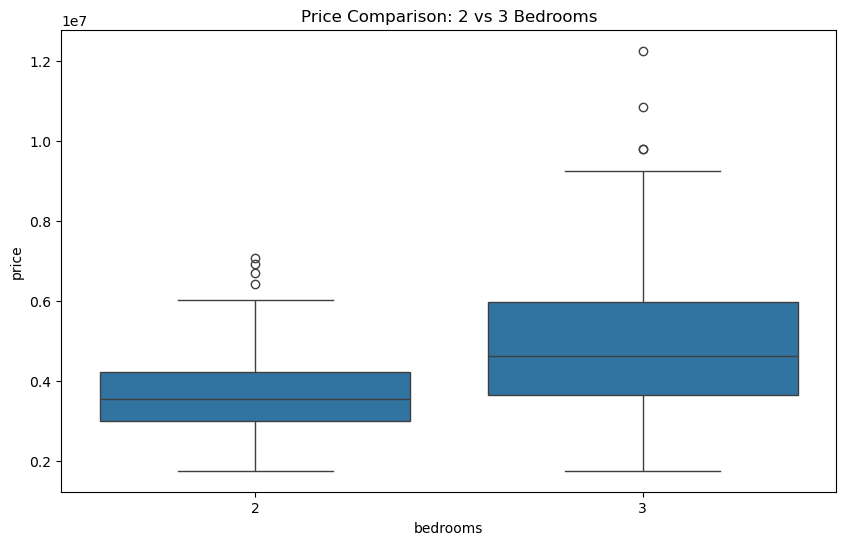

In [18]:

# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df[df['bedrooms'].isin([2, 3])])
plt.title('Price Comparison: 2 vs 3 Bedrooms')
plt.show()


In [19]:
from scipy.stats import ttest_rel

# For paired t-test, samples must be of equal length and paired.
# We'll use the first N pairs where N = min(len(two_bed), len(three_bed))
n = min(len(two_bed), len(three_bed))
paired_t_stat, paired_p_value = ttest_rel(two_bed.iloc[:n], three_bed.iloc[:n])

print("Paired T-Test Results:")
print(f"T-statistic: {paired_t_stat:.4f}")
print(f"P-value: {paired_p_value:.4e}")
print("Reject null hypothesis" if paired_p_value < 0.05 else "Fail to reject null hypothesis")

Paired T-Test Results:
T-statistic: -80.6038
P-value: 4.7538e-116
Reject null hypothesis


In [20]:
from scipy.stats import ttest_ind

# Perform Welch's t-test (unequal variances) between prices of 2-bedroom and 3-bedroom houses
welch_t_stat, welch_p_value = ttest_ind(two_bed, three_bed, equal_var=False)

print("Welch's T-Test Results:")
print(f"T-statistic: {welch_t_stat:.4f}")
print(f"P-value: {welch_p_value:.4e}")
print("Reject null hypothesis" if welch_p_value < 0.05 else "Fail to reject null hypothesis")

Welch's T-Test Results:
T-statistic: -9.9716
P-value: 4.0759e-21
Reject null hypothesis


In [21]:
from scipy.stats import f_oneway
from statsmodels.multivariate.manova import MANOVA

# ANOVA: Compare mean prices across all unique bedroom counts
anova_groups = [df[df['bedrooms'] == b]['price'] for b in df['bedrooms'].unique()]
anova_stat, anova_p = f_oneway(*anova_groups)

print("ANOVA Results (Price by Bedrooms):")
print(f"F-statistic: {anova_stat:.4f}")
print(f"P-value: {anova_p:.4e}")
print("Reject null hypothesis" if anova_p < 0.05 else "Fail to reject null hypothesis")

# MANOVA: Test effect of 'bedrooms' on 'price' and 'area'
# Prepare data for MANOVA
manova_df = df[['price', 'area', 'bedrooms']].dropna()
manova_df['bedrooms'] = manova_df['bedrooms'].astype(str)  # MANOVA requires categorical as string

maov = MANOVA.from_formula('price + area ~ bedrooms', data=manova_df)
print("\nMANOVA Results (Price and Area by Bedrooms):")
print(maov.mv_test())

ANOVA Results (Price by Bedrooms):
F-statistic: 19.6420
P-value: 5.3599e-18
Reject null hypothesis

MANOVA Results (Price and Area by Bedrooms):
                   Multivariate linear model
                                                               
---------------------------------------------------------------
         Intercept        Value  Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda 0.9868 2.0000 538.0000  3.5921 0.0282
           Pillai's trace 0.0132 2.0000 538.0000  3.5921 0.0282
   Hotelling-Lawley trace 0.0134 2.0000 538.0000  3.5921 0.0282
      Roy's greatest root 0.0134 2.0000 538.0000  3.5921 0.0282
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
        bedrooms        Value   Num DF   Den DF  F Value Pr > F
------------------------------------------

In [22]:
from statsmodels.stats.weightstats import ztest

# Perform one-sample Z-test for the mean price

# Null hypothesis: mean price = hypothetical_mean
z_stat, z_p_value = ztest(df['price'], value=hypothetical_mean)

print("\nOne-Sample Z-Test Results:")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {z_p_value:.4f}")
print("Reject null hypothesis" if z_p_value < 0.05 else "Fail to reject null hypothesis")


One-Sample Z-Test Results:
Z-statistic: 53.2537
P-value: 0.0000
Reject null hypothesis


In [23]:
from scipy.stats import chi2_contingency

# Perform Chi-Squared test of independence between 'furnishingstatus' and 'price_cluster'

# Create a contingency table
contingency_table = pandas.crosstab(df['furnishingstatus'], df['price_cluster'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Squared Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")
print("Reject null hypothesis" if p < 0.05 else "Fail to reject null hypothesis")

Chi-Squared Test Results:
Chi2 Statistic: 112.9591
Degrees of Freedom: 6
P-value: 0.0000
Reject null hypothesis


In [24]:
# Perform F-test to compare variances of prices for 2-bedroom and 3-bedroom houses

# Calculate variances
var_two_bed = two_bed.var(ddof=1)
var_three_bed = three_bed.var(ddof=1)

# Calculate F-statistic
F_stat = var_two_bed / var_three_bed

# Degrees of freedom
dfn = len(two_bed) - 1
dfd = len(three_bed) - 1

# Calculate p-value (two-tailed)
p_value_f = 2 * min(stats.f.cdf(F_stat, dfn, dfd), 1 - stats.f.cdf(F_stat, dfn, dfd))

print("F-Test for Equality of Variances (2-bed vs 3-bed prices):")
print(f"Variance (2-bed): {var_two_bed:.2f}")
print(f"Variance (3-bed): {var_three_bed:.2f}")
print(f"F-statistic: {F_stat:.4f}")
print(f"P-value: {p_value_f:.4f}")
print("Reject null hypothesis (variances are different)" if p_value_f < 0.05 else "Fail to reject null hypothesis (variances are equal)")

F-Test for Equality of Variances (2-bed vs 3-bed prices):
Variance (2-bed): 1008064421732.03
Variance (3-bed): 3053850982038.65
F-statistic: 0.3301
P-value: 0.0000
Reject null hypothesis (variances are different)


In [25]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test between prices of 2-bedroom and 3-bedroom houses
u_stat, mw_p_value = mannwhitneyu(two_bed, three_bed, alternative='two-sided')

print("Mann-Whitney U Test Results:")
print(f"U-statistic: {u_stat:.4f}")
print(f"P-value: {mw_p_value:.4f}")
print("Reject null hypothesis" if mw_p_value < 0.05 else "Fail to reject null hypothesis")

Mann-Whitney U Test Results:
U-statistic: 10618.0000
P-value: 0.0000
Reject null hypothesis


In [26]:
from scipy.stats import wilcoxon

# Perform Wilcoxon signed-rank test between prices of 2-bedroom and 3-bedroom houses
# The samples must be of the same length, so use only the first N pairs where N = min(len(two_bed), len(three_bed))
n = min(len(two_bed), len(three_bed))
wilcoxon_stat, wilcoxon_p_value = wilcoxon(two_bed.iloc[:n], three_bed.iloc[:n])

print("Wilcoxon Signed-Rank Test Results:")
print(f"Statistic: {wilcoxon_stat:.4f}")
print(f"P-value: {wilcoxon_p_value:.4f}")
print("Reject null hypothesis" if wilcoxon_p_value < 0.05 else "Fail to reject null hypothesis")

Wilcoxon Signed-Rank Test Results:
Statistic: 0.0000
P-value: 0.0000
Reject null hypothesis


In [27]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis H-test for independent samples (e.g., price by bedrooms)
# Example: Compare prices across all unique bedroom counts
groups = [df[df['bedrooms'] == b]['price'] for b in df['bedrooms'].unique()]
kw_stat, kw_p_value = kruskal(*groups)

print("Kruskal-Wallis H-Test Results:")
print(f"H-statistic: {kw_stat:.4f}")
print(f"P-value: {kw_p_value:.4f}")
print("Reject null hypothesis" if kw_p_value < 0.05 else "Fail to reject null hypothesis")

Kruskal-Wallis H-Test Results:
H-statistic: 91.9983
P-value: 0.0000
Reject null hypothesis


In [28]:
from scipy.stats import friedmanchisquare

# Prepare data for Friedman test: compare prices across different furnishing statuses within the same price clusters
# For each price_cluster, collect prices for each furnishingstatus
clusters = df['price_cluster'].unique()
statuses = df['furnishingstatus'].unique()

# Build a list of lists: each inner list contains prices for a furnishingstatus within each cluster
friedman_data = []
for status in statuses:
    group = []
    for cluster in clusters:
        prices = df[(df['furnishingstatus'] == status) & (df['price_cluster'] == cluster)]['price']
        group.append(prices.values)
    # Only include if all clusters have at least one value
    if all(len(g) > 0 for g in group):
        # Truncate to the minimum length across clusters for this status
        min_len = min(len(g) for g in group)
        group = [g[:min_len] for g in group]
        friedman_data.extend(group)

# Reshape data for the test: each column is a group (cluster), each row is a block (matched sample)
# We'll use the minimum sample size across all groups
min_samples = min(len(g) for g in friedman_data)
data_for_test = [g[:min_samples] for g in friedman_data]

# Transpose so each group is a column
data_for_test = np.array(data_for_test).reshape(-1, len(clusters)).T

# Perform Friedman test
friedman_stat, friedman_p = friedmanchisquare(*data_for_test)

print("Friedman Test Results:")
print(f"Statistic: {friedman_stat:.4f}")
print(f"P-value: {friedman_p:.4e}")
print("Reject null hypothesis" if friedman_p < 0.05 else "Fail to reject null hypothesis")

Friedman Test Results:
Statistic: 142.2342
P-value: 1.2465e-30
Reject null hypothesis
